# Generate and visualize filter strengths

_Author: Nhi Nguyen_

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
from src.get_viz_data import get_deciphering_rna_splicing_data

## 1. Generate and save filter strengths

In [18]:
exons = [
    "GCGGCACCTACTACAATGTCCCCCGCTGCATACACTCGGAGCCAATAGGGCGCCTATAGAGTGTAGTCCT",
    "TCGCACCGCAGGTTCGGTTTTTTGGTATAATACGCGGCACTCCAAAATTACTCTGGGGCACCCTCACCAG",
    "GCCCGAAAGCTCCCTACTGCAGTTTACGACCCTTAAGGCTTGGGTGCTCTTACGCGCTGATCGATATAAG",
    "CCCTACCCGCCCTCGTCCCCAGGACACCCTTTCCGCCGCAAGTTATCCGCCAAGTACACAACTTAATGGT",
    "GGTGTCCCCCACTATCGACCTCATCAGTAATCAATCCGAGCGACCGCCTCATCCCAAAGGCACACGTCCA"
]
json_file = "data/deciphering_rna_splicing.json"
json_data = get_deciphering_rna_splicing_data(exons=exons, json_file=json_file)

1/1 [==============================] - 0s 13ms/step


## 2. Load filter strengths

In [19]:
exon_id = 0
exon_data = json_data[exon_id]
data = pd.DataFrame(exon_data["activations"])
print(data.shape)
data.head()

(90, 19)


,position,incl_1,incl_2,incl_3,incl_4,incl_5,incl_6,incl_7,incl_1_struct,skip_7,skip_8,skip_9,skip_11,skip_10,skip_12,skip_p,skip_s,skip_dot,skip_blank
0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
1,1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
2,2,2.406730e-05,3.051553e-07,2.134268e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.302126e-07,1.473838e-07,3.248956e-07,1.168151e-15,3.718131e-07,0.000000e+00,1.328008e-08,0.006624,0.007988,1.411970e-07,2.861605e-10
3,3,6.198072e-07,8.393712e-07,1.181085e-07,0.000000e+00,2.632976e-08,1.414654e-17,1.117302e-14,2.606697e-07,1.388681e-07,5.003432e-11,4.009794e-07,3.432117e-08,1.185070e-11,6.520578e-09,0.002541,0.000917,1.306813e-07,6.451252e-09
4,4,4.109646e-12,6.462889e-10,4.176614e-07,5.963097e-11,2.930751e-07,6.364555e-08,1.264302e-15,2.293102e-07,3.128267e-08,1.709166e-06,5.777560e-06,4.492362e-08,8.704890e-08,3.743523e-10,0.015760,0.000014,5.997204e-08,5.870180e-09


In [25]:
exon = exon_data["exon"]
exon = exon.replace("T", "U")
print(exon)
sequence = exon_data["sequence"].replace("T", "U")

GCGGCACCUACUACAAUGUCCCCCGCUGCAUACACUCGGAGCCAAUAGGGCGCCUAUAGAGUGUAGUCCU


## 3. Visualize filter strengths

In [26]:
FILTER_NAMES = {
    "incl_bias": "B", "skip_bias": "B",
    "incl_1": 1, "incl_2": 2, "incl_3": 3, "incl_4": 4, "incl_5": 5, "incl_6": 6,
    "skip_7": 7, "skip_8": 8, "skip_9": 9, "skip_10": 10, "skip_11": 11, "skip_12": 12, 
    "skip_s": "S", "skip_p": "P" ,
    # "incl_7": "7", "incl_struct_1": "1s", "skip_blank": "_", "skip_dot": "."
}

### 3.1. Position-based plot

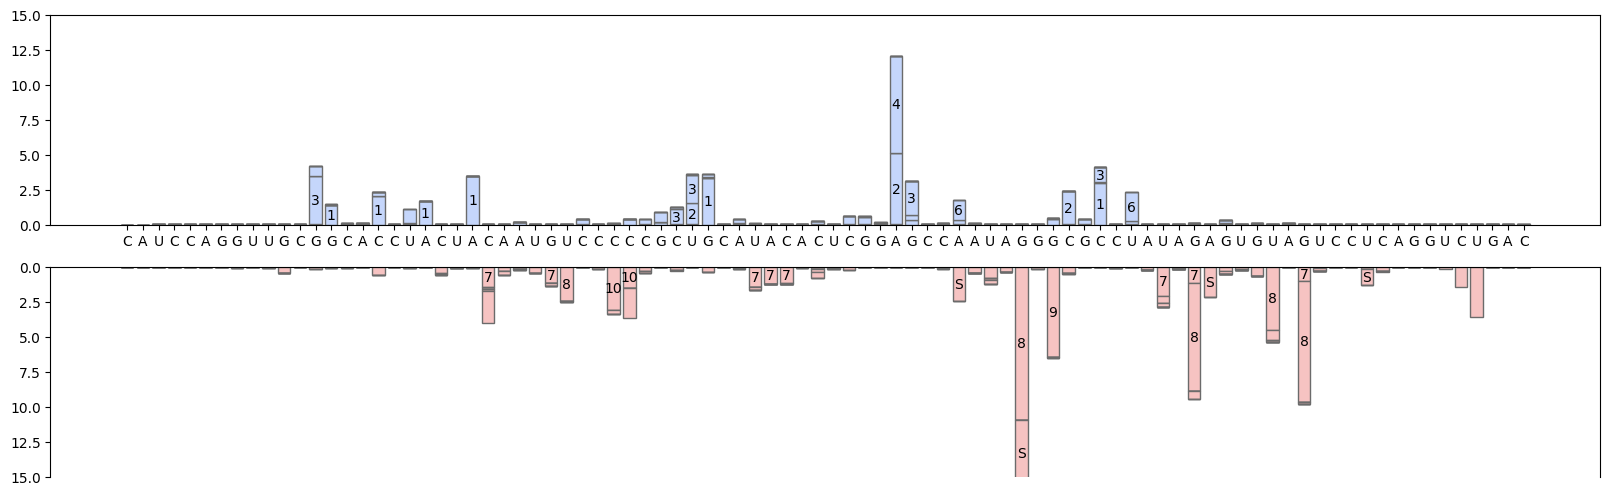

In [43]:
# Get data
positions = data["position"]
incl_position_forces = data.iloc[:,1:9]
incl_position_forces_cumsum = incl_position_forces.cumsum(axis=1)
skip_position_forces = data.iloc[:,9:]
skip_position_forces_cumsum = skip_position_forces.cumsum(axis=1)

# Set up figures
fig, axes = plt.subplots(2, figsize=(20, 6))
axes[0].set_ylim((0, 15))
axes[0].set_xticks(positions)
axes[0].set_xticklabels(sequence)
axes[1].set_ylim((0, 15))
axes[1].invert_yaxis()
axes[1].set_xticks([])
axes[1].spines["top"].set_visible(True)
axes[1].spines["bottom"].set_visible(False)

# Plot
axes[0].bar(positions, incl_position_forces.iloc[:,0], color="#c5d6fb", edgecolor="#6b6b6b")
for pos in positions:
    if incl_position_forces.iloc[pos,0] > 1:
        axes[0].annotate(FILTER_NAMES[incl_position_forces.iloc[:,0].name], 
                         (pos, incl_position_forces_cumsum.iloc[pos,0] - incl_position_forces.iloc[pos,0]/2), 
                            ha="center", va="center", fontsize=10)
for i in range(1, incl_position_forces.shape[1]):
    column = incl_position_forces.iloc[:,i].name
    filter = FILTER_NAMES[column] if column in FILTER_NAMES.keys() else ""
    axes[0].bar(positions, incl_position_forces.iloc[:,i], 
                bottom=incl_position_forces_cumsum.iloc[:,i-1], color="#c5d6fb", edgecolor="#6b6b6b")
    for pos in positions:
        if incl_position_forces.iloc[pos,i] > 1:
            axes[0].annotate(filter, 
                             (pos, incl_position_forces_cumsum.iloc[pos,i] - incl_position_forces.iloc[pos,i]/2), 
                             ha="center", va="center", fontsize=10)
axes[1].bar(positions, skip_position_forces.iloc[:,0], color="#f6c3c2", edgecolor="#6b6b6b")
for pos in positions:
    if skip_position_forces.iloc[pos,0] > 1:
        axes[1].annotate(FILTER_NAMES[skip_position_forces.iloc[:,0].name], 
                         (pos, skip_position_forces_cumsum.iloc[pos,0] - skip_position_forces.iloc[pos,0]/2), 
                            ha="center", va="center", fontsize=10)
for i in range(1, skip_position_forces.shape[1]):
    column = skip_position_forces.iloc[:,i].name
    filter = FILTER_NAMES[column] if column in FILTER_NAMES.keys() else ""
    axes[1].bar(positions, skip_position_forces.iloc[:,i], 
                bottom=skip_position_forces_cumsum.iloc[:,i-1], color="#f6c3c2", edgecolor="#6b6b6b")
    for pos in positions:
        if skip_position_forces.iloc[pos,i] > 1:
            axes[1].annotate(filter, 
                             (pos, skip_position_forces_cumsum.iloc[pos,i] - skip_position_forces.iloc[pos,i]/2), 
                             ha="center", va="center", fontsize=10)
plt.show()

### 3.2. Balance plot

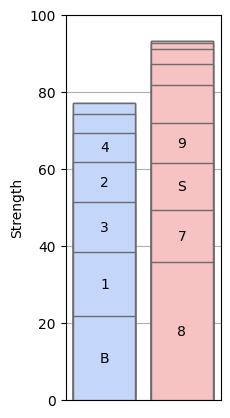

In [41]:
# Get data
incl_forces = pd.concat([
    pd.Series([exon_data["incl_bias"]], index=["incl_bias"]), 
    data.iloc[:,1:9].sum(axis=0)
]).sort_values(ascending=False)
incl_forces_cumsum = incl_forces.cumsum()
skip_forces =  pd.concat([
    pd.Series([exon_data["skip_bias"]], index=["skip_bias"]), 
    data.iloc[:,9:].sum(axis=0)
]).sort_values(ascending=False)
skip_forces_cumsum = skip_forces.cumsum()

# Set up figures
fig, ax = plt.subplots(figsize=(2, 5))
ax.set_ylim((0, 100))
ax.set_ylabel("Strength")
ax.set_xlim((-1, 1))
ax.set_xticklabels([])
ax.set_xticks([])
ax.grid(axis="y", which="both", zorder=0)
ax.spines["right"].set_visible(True)

# Plot
for i in range(len(incl_forces)):
    ax.bar([-0.5], incl_forces_cumsum[i], color="#c5d6fb", edgecolor="#6b6b6b", zorder=20-i)
    if incl_forces[i] > 7 and incl_forces.keys()[i] in FILTER_NAMES.keys():
        ax.annotate(FILTER_NAMES[incl_forces.keys()[i]], (-0.5, incl_forces_cumsum[i]-incl_forces[i]/2), 
                    ha="center", va="center", zorder=20)
for i in range(len(skip_forces)):
    ax.bar([0.5], skip_forces_cumsum[i], color="#f6c3c2", edgecolor="#6b6b6b", zorder=20-i)
    if skip_forces[i] > 7 and skip_forces.keys()[i] in FILTER_NAMES.keys():
        ax.annotate(FILTER_NAMES[skip_forces.keys()[i]], (0.5, skip_forces_cumsum[i]-skip_forces[i]/2),
                    ha="center", va="center", zorder=20)
plt.show()

### 3.3. Predicted PSI

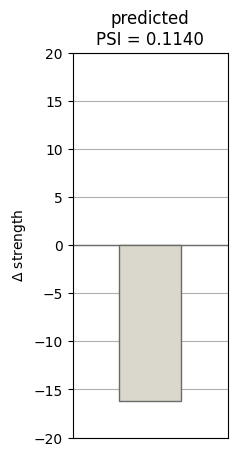

In [42]:
# Get data
delta_force = exon_data["delta_force"]
predicted_psi = exon_data["predicted_psi"]

# Set up figures
fig, ax = plt.subplots(figsize=(2, 5))
ax.set_ylim((-20, 20))
ax.set_ylabel("$\Delta$ strength")
ax.set_xlim((-1, 1))
ax.plot([-1,1],[0,0],color="#6b6b6b",linewidth=1)
ax.set_xticklabels([])
ax.set_xticks([])
ax.grid(axis="y", which="both", zorder=0)
ax.spines["right"].set_visible(True)

# Plot
ax.bar([0], [delta_force], color="#dad7cd", edgecolor="#6b6b6b", zorder=2)
ax.set_title(f"predicted\nPSI = {predicted_psi:.4f}")
plt.show()